<a href="https://colab.research.google.com/github/krisna31/air-bnb-rent-price-analytics/blob/main/Air_BNB_Rent_Price_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What
Create a model to **Predict** the rent price for airbnb based on the data

In [ ]:
"""
  Jelvin Krisna Putra 
  College Student
  Join since 2021
  Palembang City
"""
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 182MB/s]


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/new-york-city-airbnb-open-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

hotels = pd.read_csv("/content/AB_NYC_2019.csv")
hotels

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# Drop columnn that aren't relevant to the price
hotels = hotels.drop(["id","name","host_name","host_id", "last_review"], axis=1)
hotels

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [ ]:
hotels.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
price = (hotels.price == 0).sum()
availability_365 = (hotels.availability_365 == 0).sum()
 
print("Nilai 0 di kolom price ada: ", price)
print("Nilai 0 di kolom availability setahun ada: ", availability_365)

Nilai 0 di kolom price ada:  11
Nilai 0 di kolom availability setahun ada:  17533


In [ ]:
# check for NaN value
hotels.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
mean = hotels['reviews_per_month'].mean()
hotels['reviews_per_month'].fillna(mean, inplace=True)
hotels.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# Drop baris dengan nilai price = 0 untuk availability tidak karena hotel bisa jadi sedang dalam renovasi
hotels = hotels.loc[(hotels[['price']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
hotels.shape

(48884, 11)

<Axes: xlabel='minimum_nights'>

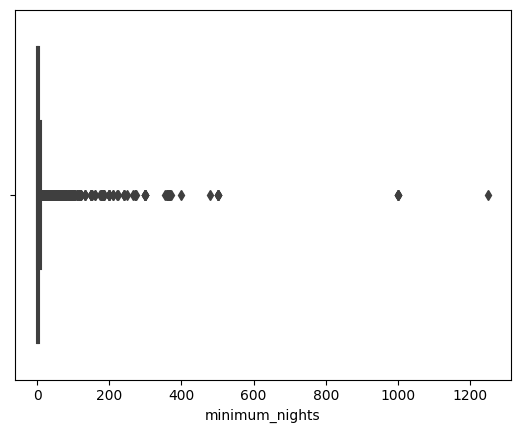

In [ ]:
sns.boxplot(x=hotels['minimum_nights'])

<Axes: xlabel='calculated_host_listings_count'>

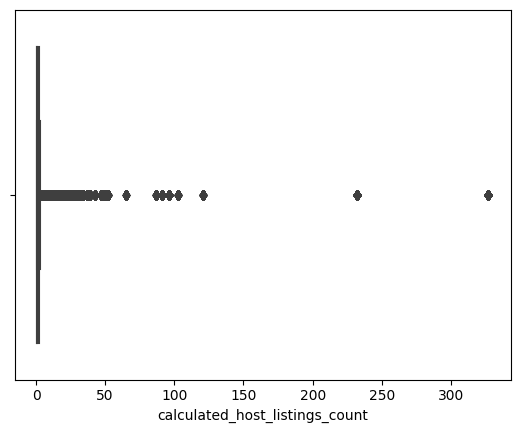

In [ ]:
sns.boxplot(x=hotels['calculated_host_listings_count'])

In [ ]:
Q1 = hotels.quantile(0.25)
Q3 = hotels.quantile(0.75)
IQR=Q3-Q1
hotels=hotels[~((hotels<(Q1-1.5*IQR))|(hotels>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
hotels.shape

<ipython-input-111-ce09fdebb5d8>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = hotels.quantile(0.25)
<ipython-input-111-ce09fdebb5d8>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = hotels.quantile(0.75)
<ipython-input-111-ce09fdebb5d8>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  hotels=hotels[~((hotels<(Q1-1.5*IQR))|(hotels>(Q3+1.5*IQR))).any(axis=1)]


(27764, 11)

<Axes: xlabel='minimum_nights'>

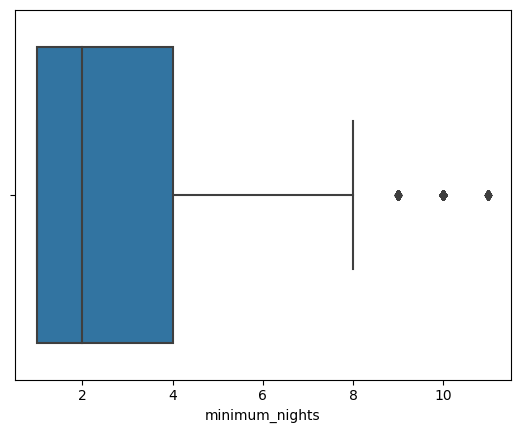

In [ ]:
sns.boxplot(x=hotels['minimum_nights'])

In [ ]:
numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

           jumlah sampel  persentase
Brooklyn           13007        46.8
Manhattan          12206        44.0
Queens              2177         7.8
Bronx                374         1.3


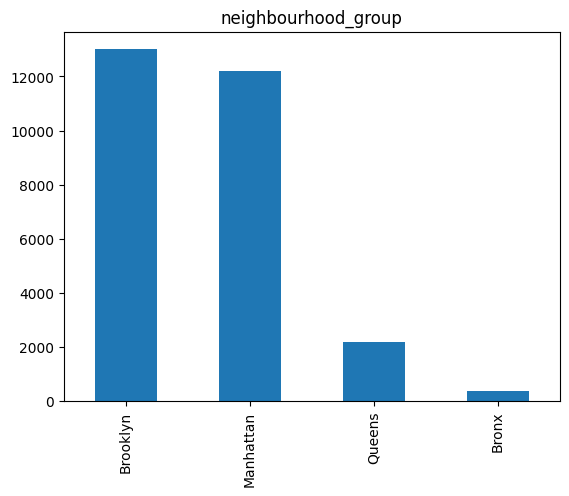

In [ ]:
feature = categorical_features[0]
count = hotels[feature].value_counts()
percent = 100*hotels[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                    jumlah sampel  persentase
Williamsburg                 2808        10.1
Bedford-Stuyvesant           2210         8.0
Harlem                       1695         6.1
Bushwick                     1629         5.9
East Village                 1253         4.5
...                           ...         ...
Corona                          1         0.0
Manhattan Beach                 1         0.0
Allerton                        1         0.0
Van Nest                        1         0.0
Coney Island                    1         0.0

[119 rows x 2 columns]


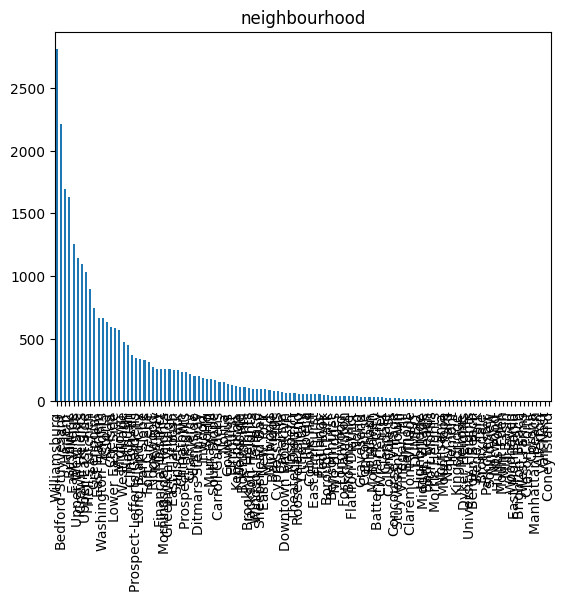

In [ ]:
feature = categorical_features[1]
count = hotels[feature].value_counts()
percent = 100*hotels[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
Entire home/apt          13929        50.2
Private room             13328        48.0
Shared room                507         1.8


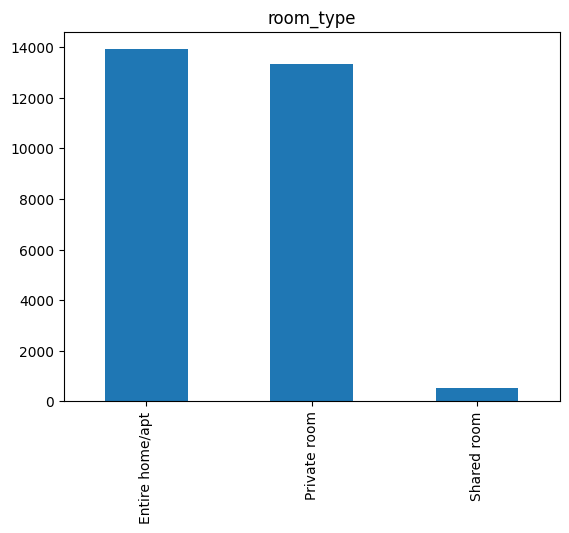

In [ ]:
feature = categorical_features[2]
count = hotels[feature].value_counts()
percent = 100*hotels[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

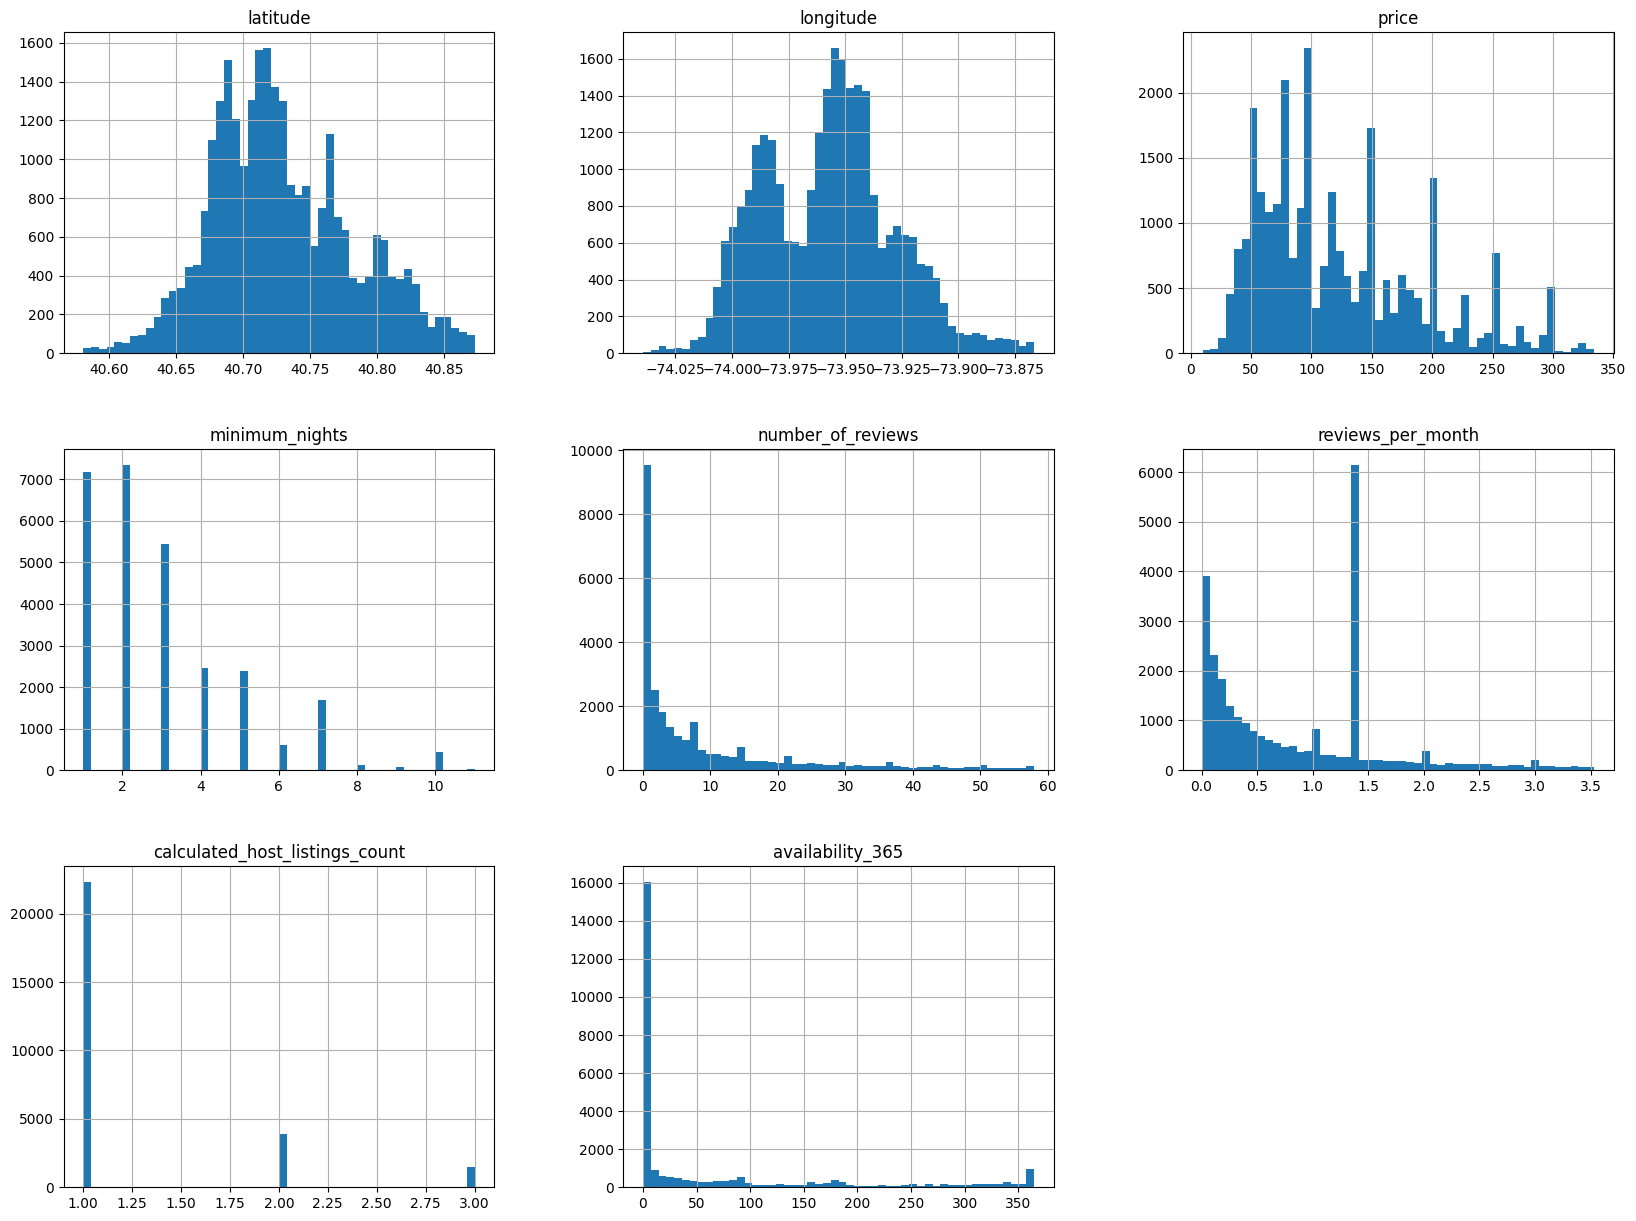

In [ ]:
hotels.hist(bins=50, figsize=(20,15))
plt.show()

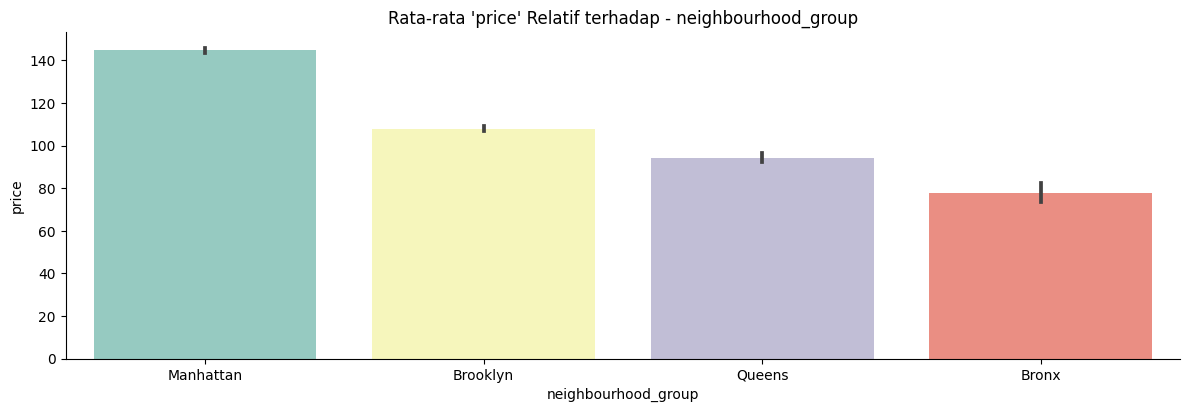

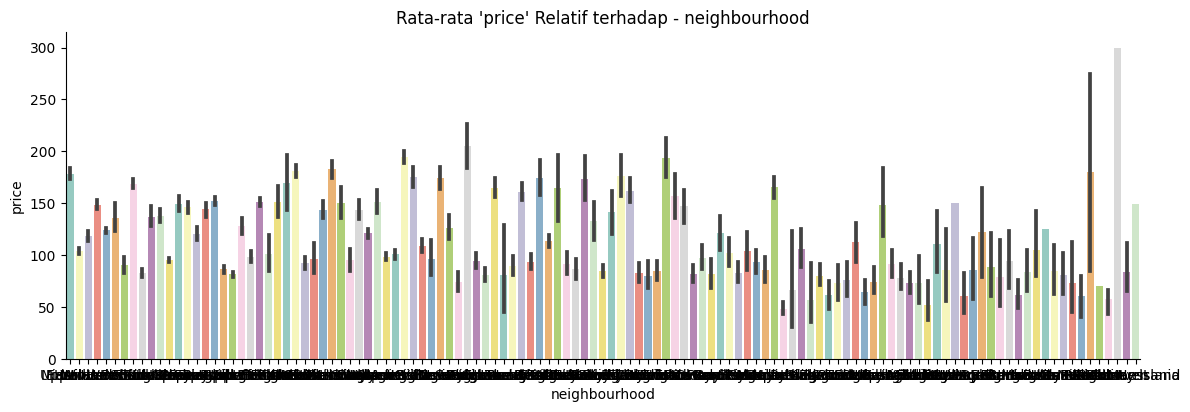

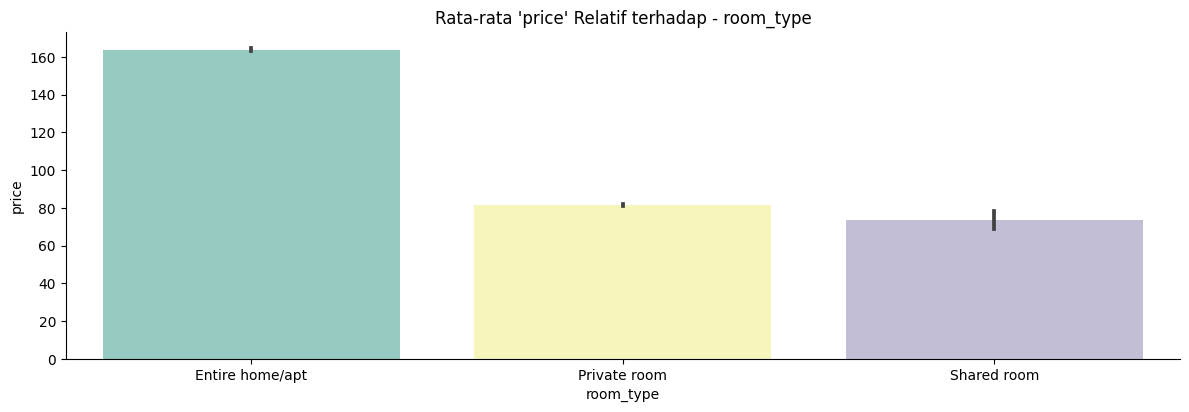

In [ ]:
cat_features = hotels.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=hotels, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

In [ ]:
hotels = hotels.drop(['neighbourhood'], axis=1)
hotels.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


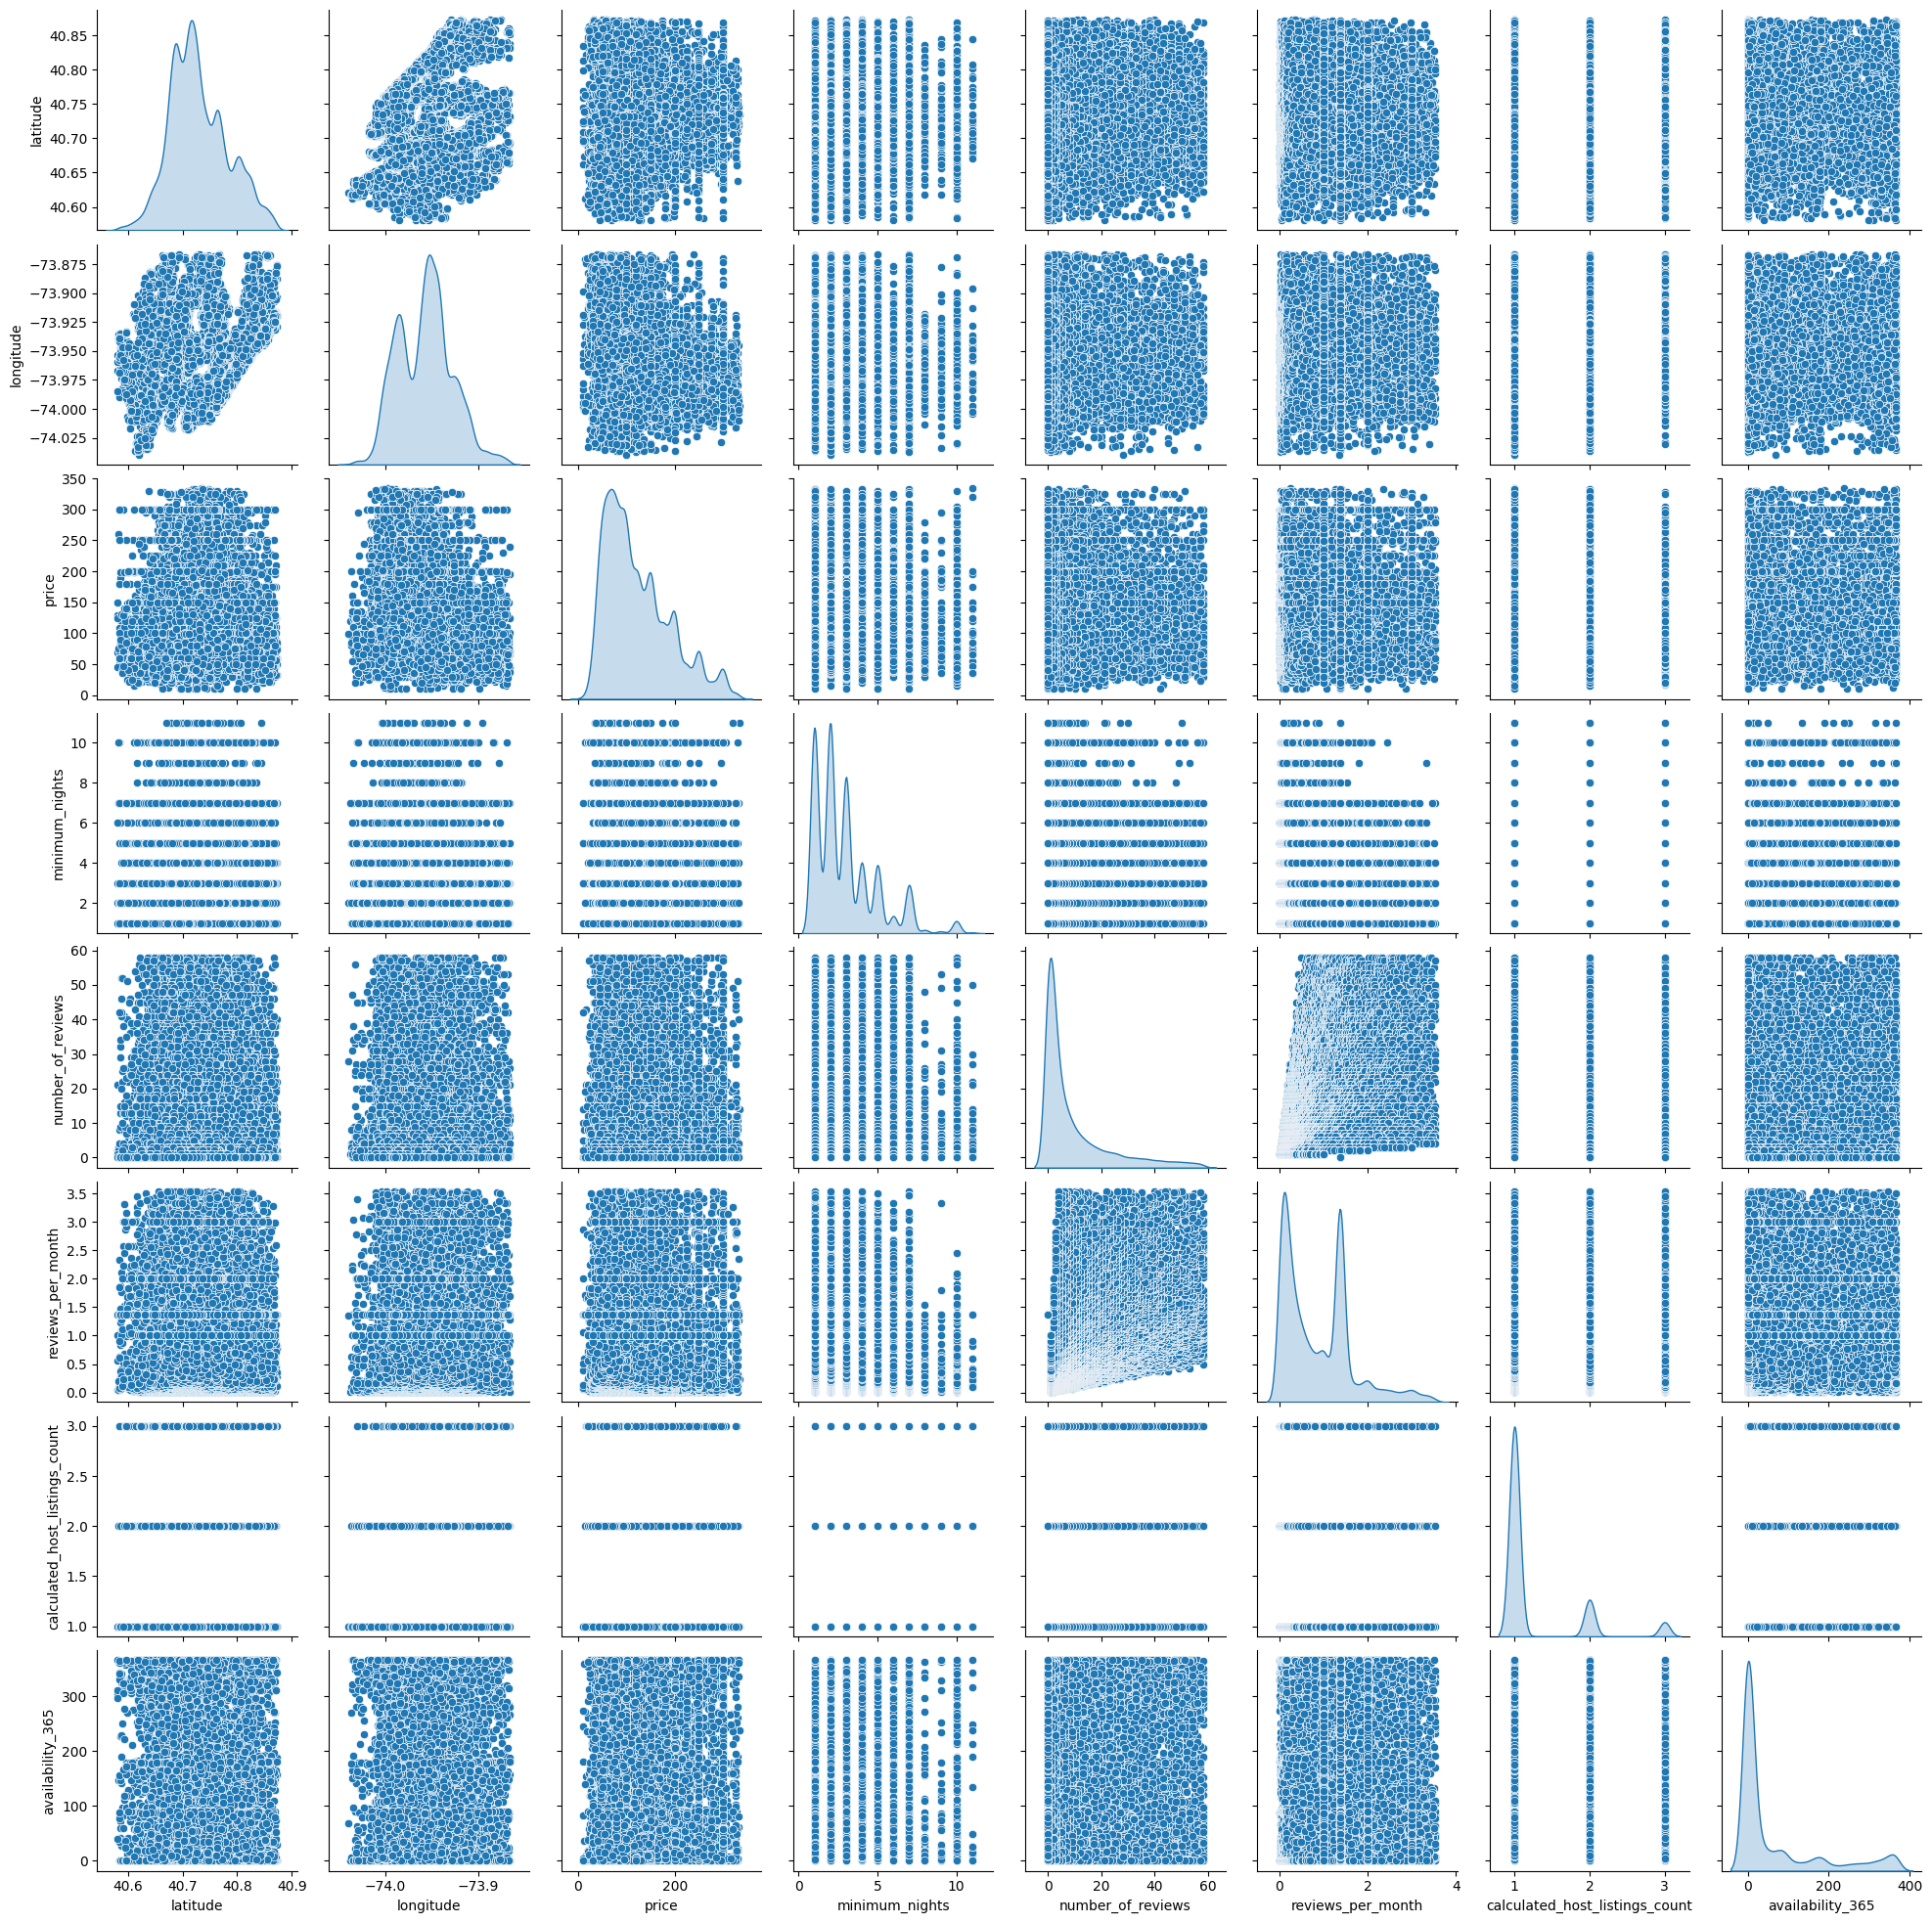

In [ ]:
sns.pairplot(hotels, diag_kind = 'kde')

<ipython-input-124-38584e4aa546>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hotels.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

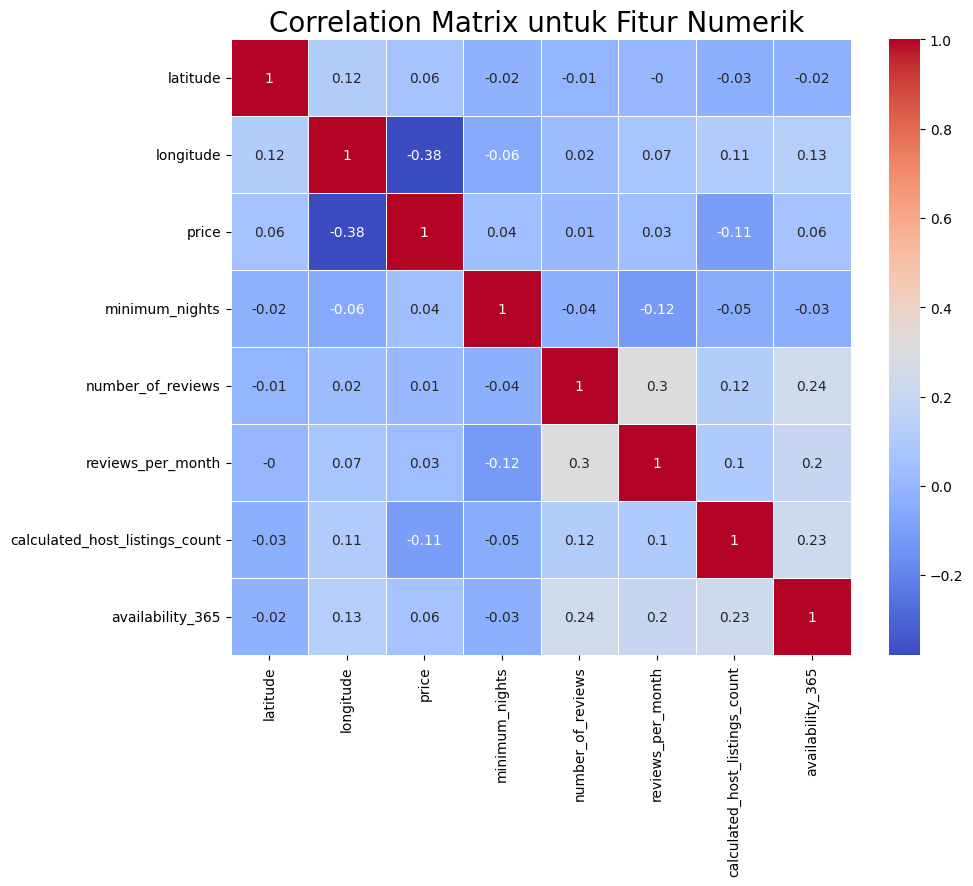

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = hotels.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
hotels = pd.concat([hotels, pd.get_dummies(hotels['neighbourhood_group'], prefix='neighbourhood_group')],axis=1)
hotels = pd.concat([hotels, pd.get_dummies(hotels['room_type'], prefix='room_type')],axis=1)
hotels.drop(['neighbourhood_group','room_type'], axis=1, inplace=True)
hotels.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,40.75362,-73.98377,225,1,45,0.380000,2,355,0,0,1,0,1,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,0,1,0,0,1,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,0,1,0,1,0,0


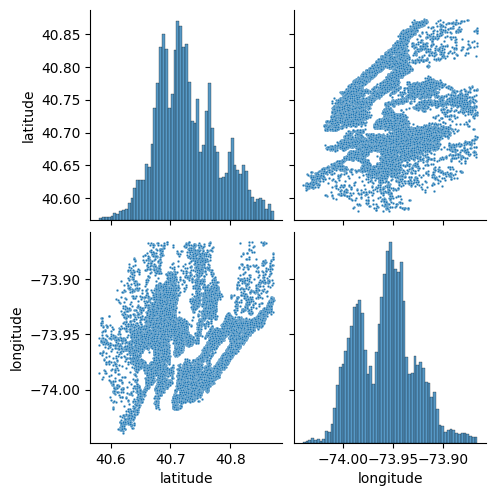

In [ ]:
sns.pairplot(hotels[['latitude','longitude']], plot_kws={"s": 3});

In [ ]:
from sklearn.model_selection import train_test_split
 
X = hotels.drop(["price"],axis =1)
y = hotels["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 27764
Total # of sample in train dataset: 24987
Total # of sample in test dataset: 2777


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical_features = ['neighbourhood_group', 'room_type']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
40222,-1.660735,0.077269,-0.981524,-0.414043,-0.318931,1.377734,-0.597518
20744,1.572479,0.132742,-0.477074,0.048231,-0.665028,1.377734,-0.597518
42254,-0.095989,-1.104886,-0.981524,-0.645179,-0.318931,-0.459367,2.740751
20908,-0.039103,2.326499,0.027376,-0.645179,-1.088036,-0.459367,-0.597518
18002,-1.003322,-1.473900,0.027376,2.898918,0.668087,-0.459367,2.219432


In [ ]:
X_train[numerical_features].describe().round(4)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24987.0000,24987.0000,24987.0000,24987.0000,24987.0000,24987.0000,24987.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.8117,-2.8307,-0.9815,-0.7222,-1.1137,-0.4594,-0.5975
25%,-0.7330,-0.8427,-0.9815,-0.6452,-0.8958,-0.4594,-0.5975
50%,-0.1546,0.0559,-0.4771,-0.4911,-0.2292,-0.4594,-0.5975
75%,0.6575,0.5996,0.5318,0.2794,0.6338,-0.4594,0.1982
max,2.7193,3.1331,4.0630,3.7464,3.3984,3.2148,2.7408


In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,1.920787,2.288073
RF,0.734914,2.129283
Boosting,2.37971,2.307816


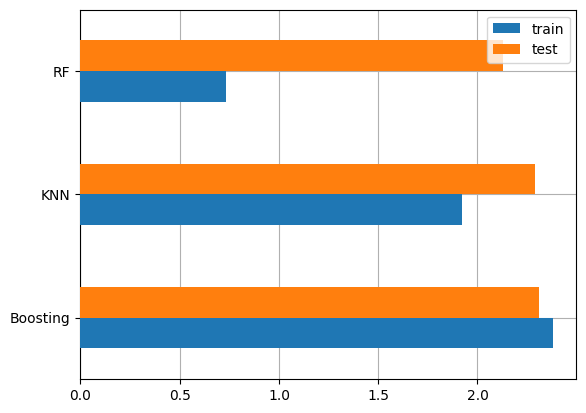

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
7348,200,184.4,205.9,193.3
